### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = [tienda, tienda2, tienda3, tienda4]


tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
'''
En este primer análisis, debes calcular el ingreso total de cada tienda.
Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.
'''
import matplotlib.pyplot as plt


In [ ]:
tiendas = [tienda, tienda2, tienda3, tienda4]
suma_precios_tienda = [tienda["Precio"].sum() for tienda in tiendas]
suma_precios_tienda

[np.float64(1150880400.0),
 np.float64(1116343500.0),
 np.float64(1098019600.0),
 np.float64(1038375700.0)]

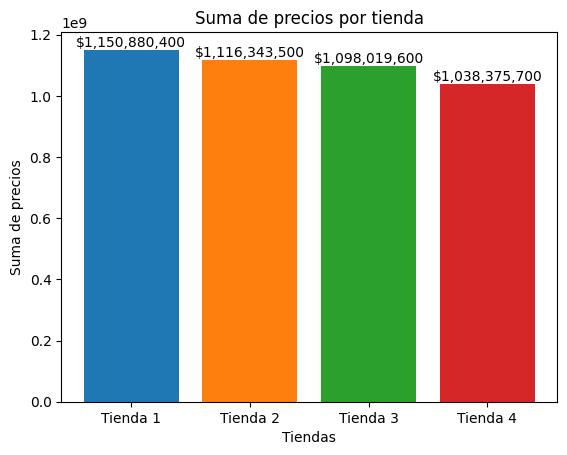

In [ ]:
def grafico_precios(lista_tiendas):
  colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
  nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
  bars = plt.bar(nombres, lista_tiendas, color=colores)
  for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1000,
            f'${int(height):,}',
            ha='center', va='bottom', fontsize=10
        )

  plt.xlabel('Tiendas')
  plt.ylabel('Suma de precios')
  plt.title('Suma de precios por tienda')
  plt.show()

grafico_precios(suma_precios_tienda)

# 2. Ventas por categoría

In [ ]:
'''
En este debes calcular la cantidad de productos vendidos por categoría en cada tienda.
La idea es agrupar los datos por categoría
y contar el número de ventas de cada tipo,
mostrando las categorías más populares de cada tienda.
'''
conteo_por_categoria = [tienda['Categoría del Producto'].value_counts() for tienda in tiendas]
conteo_por_categoria

[Categoría del Producto
 Muebles                    465
 Electrónicos               448
 Juguetes                   324
 Electrodomésticos          312
 Deportes y diversión       284
 Instrumentos musicales     182
 Libros                     173
 Artículos para el hogar    171
 Name: count, dtype: int64,
 Categoría del Producto
 Muebles                    442
 Electrónicos               422
 Juguetes                   313
 Electrodomésticos          305
 Deportes y diversión       275
 Instrumentos musicales     224
 Libros                     197
 Artículos para el hogar    181
 Name: count, dtype: int64,
 Categoría del Producto
 Muebles                    499
 Electrónicos               451
 Juguetes                   315
 Electrodomésticos          278
 Deportes y diversión       277
 Libros                     185
 Instrumentos musicales     177
 Artículos para el hogar    177
 Name: count, dtype: int64,
 Categoría del Producto
 Muebles                    480
 Electrónicos       

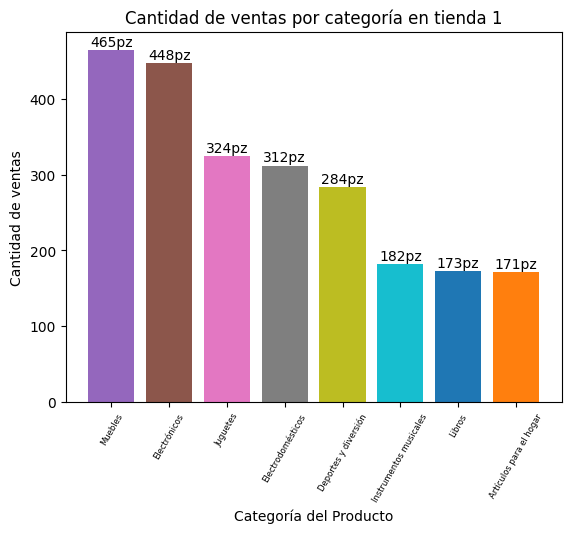

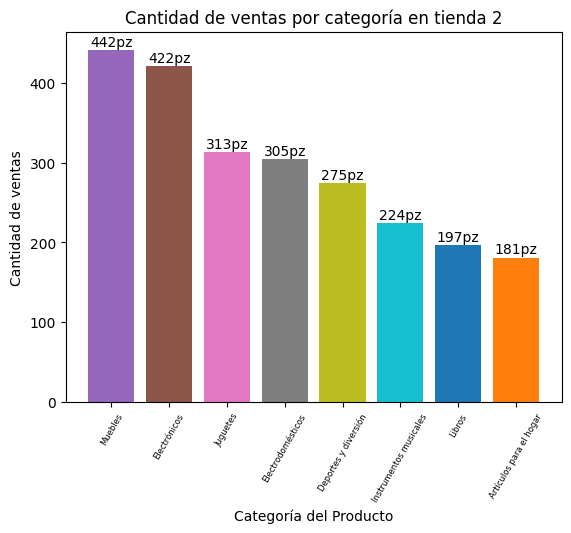

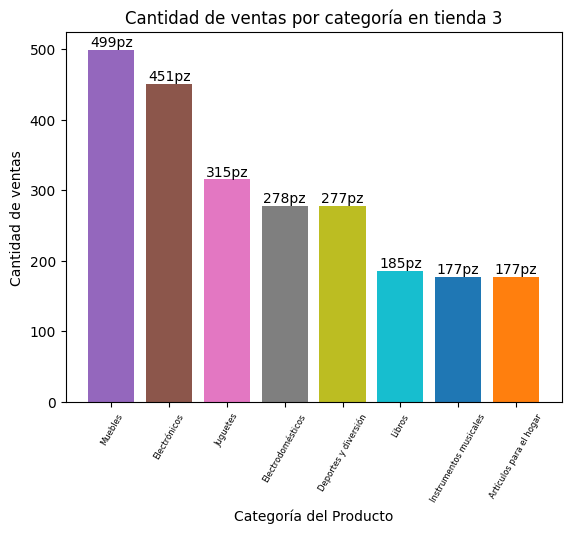

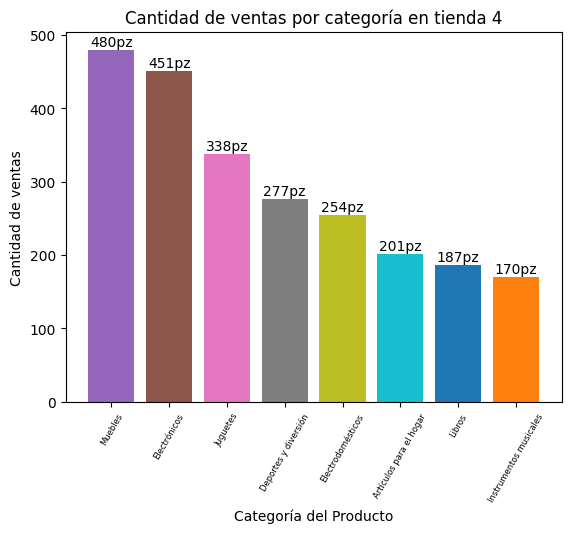

In [ ]:
#Grafico por tienda
def grafico_categorias(tienda,cont):
  colores = [
    '#9467bd',  # morado
    '#8c564b',  # café
    '#e377c2',  # rosa
    '#7f7f7f',  # gris
    '#bcbd22',  # amarillo verdoso
    '#17becf',   # azul celeste
    '#1f77b4',  # azul
    '#ff7f0e',  # naranja
    '#2ca02c',  # verde
    '#d62728'  # rojo
    ]
  bars = plt.bar(tienda.index, tienda.values, color=colores)
  for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f'{int(height)}pz',
            ha='center', va='bottom', fontsize=10
        )
  plt.xlabel('Categoría del Producto')
  plt.ylabel('Cantidad de ventas')
  plt.xticks(rotation=60, fontsize=6)
  plt.title(f'Cantidad de ventas por categoría en tienda {cont}')
  plt.show()

cont = 0
for tienda in conteo_por_categoria:
  cont +=1
  grafico_categorias(tienda,cont)


# 3. Calificación promedio de la tienda


In [ ]:
'''
En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda.
El objetivo es conocer la satisfacción del cliente con los productos vendidos.
'''
calificaciones_promedio = [tienda['Calificación'].mean() for tienda in tiendas]
calificaciones_promedio = [round(calificacion, 2) for calificacion in calificaciones_promedio]
calificaciones_promedio

[np.float64(3.98), np.float64(4.04), np.float64(4.05), np.float64(4.0)]

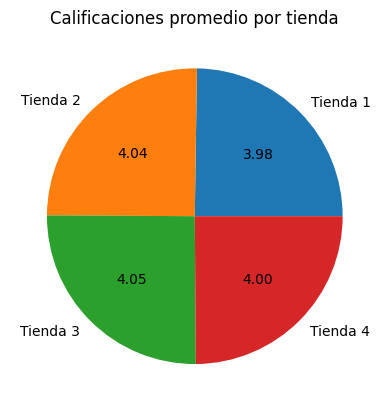

In [ ]:
def grafico_de_satisfaccion(calificaciones):
    colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

    plt.pie(
        calificaciones,
        labels=nombres,
        colors=colores,
        autopct=lambda p: f'{p * sum(calificaciones) / 100:.2f}'
    )
    plt.title('Calificaciones promedio por tienda')
    plt.show()

grafico_de_satisfaccion(calificaciones_promedio)

# 4. Productos más y menos vendidos

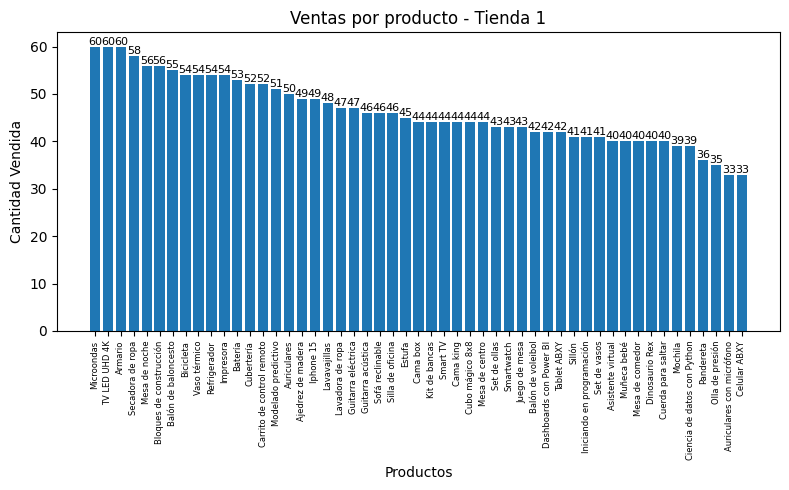

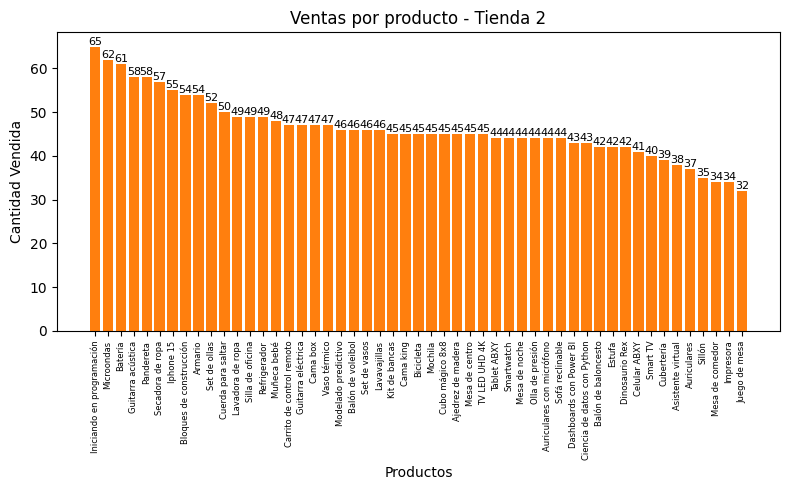

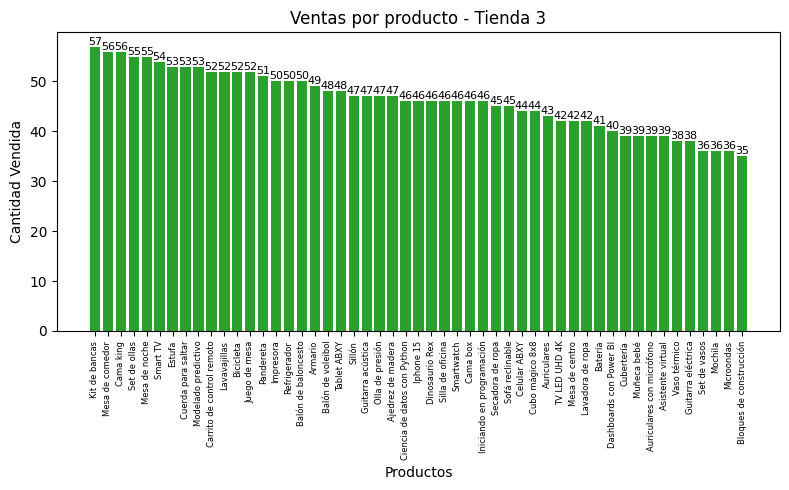

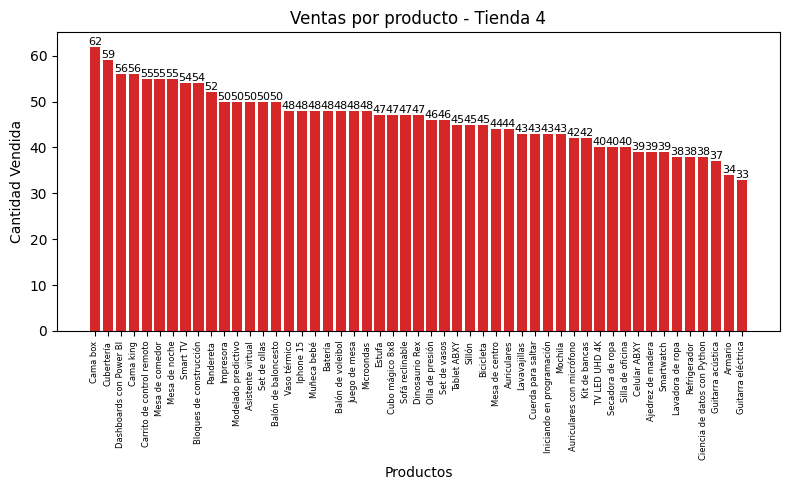

In [ ]:
import matplotlib.pyplot as plt

def graficos_por_tienda(tiendas):
    nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    for i, tienda in enumerate(tiendas):
        conteo = tienda['Producto'].value_counts().sort_values(ascending=False)

        plt.figure(figsize=(8, 5))
        bars = plt.bar(conteo.index, conteo.values, color=colores[i])
        plt.xlabel('Productos')
        plt.ylabel('Cantidad Vendida')
        plt.title(f'Ventas por producto - {nombres[i]}')
        plt.xticks(rotation=90, fontsize=6)

        # Etiquetas sobre las barras
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height,
                     f'{int(height)}', ha='center', va='bottom', fontsize=8)

        plt.tight_layout()
        plt.show()

# Llama a la función
graficos_por_tienda(tiendas)



📍 Tienda 1
🟢 Más vendido(s):
   - Microondas: 60 unidades
   - TV LED UHD 4K: 60 unidades
   - Armario: 60 unidades
🔴 Menos vendido(s):
   - Auriculares con micrófono: 33 unidades
   - Celular ABXY: 33 unidades


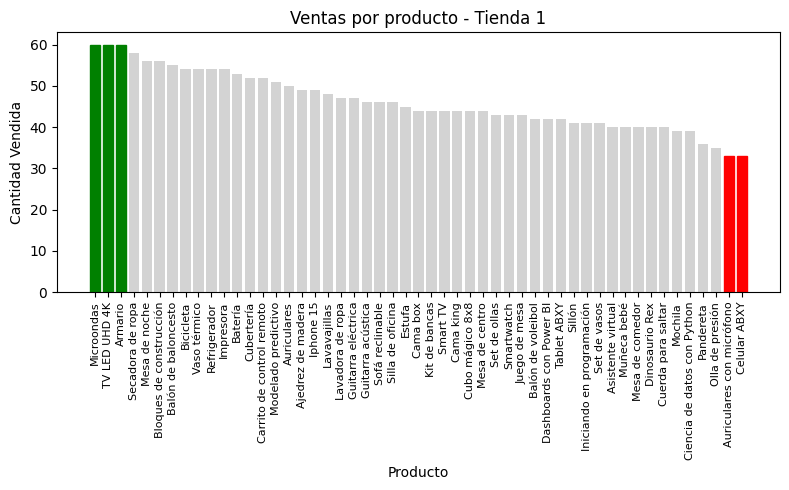


📍 Tienda 2
🟢 Más vendido(s):
   - Iniciando en programación: 65 unidades
🔴 Menos vendido(s):
   - Juego de mesa: 32 unidades


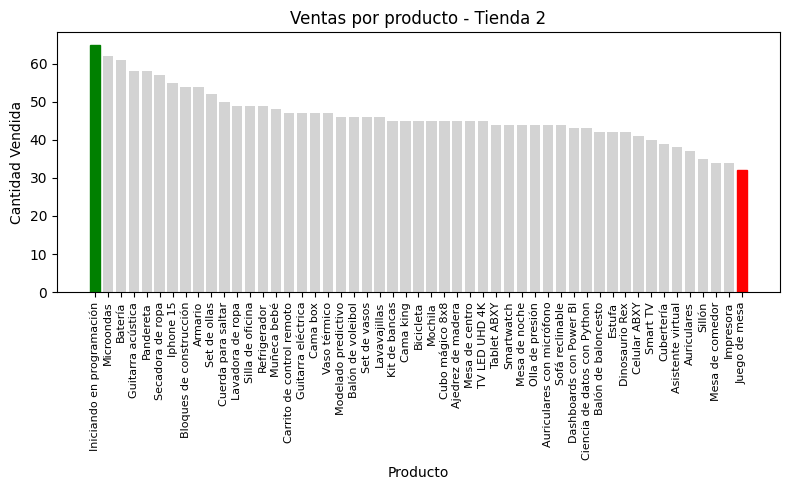


📍 Tienda 3
🟢 Más vendido(s):
   - Kit de bancas: 57 unidades
🔴 Menos vendido(s):
   - Bloques de construcción: 35 unidades


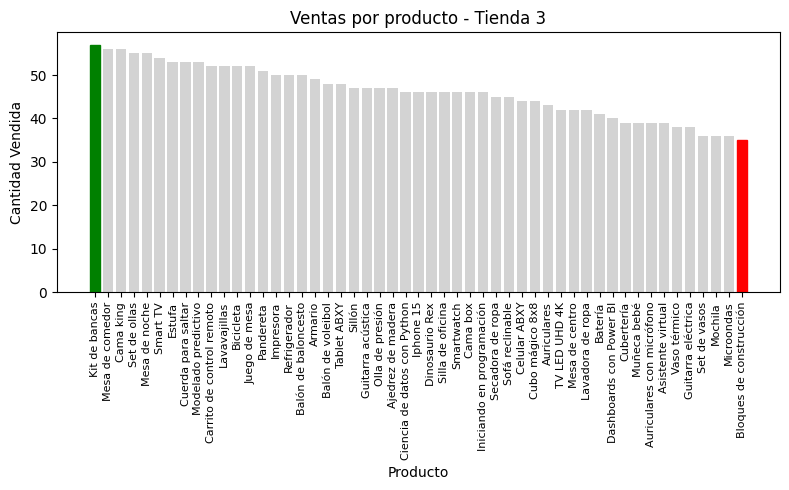


📍 Tienda 4
🟢 Más vendido(s):
   - Cama box: 62 unidades
🔴 Menos vendido(s):
   - Guitarra eléctrica: 33 unidades


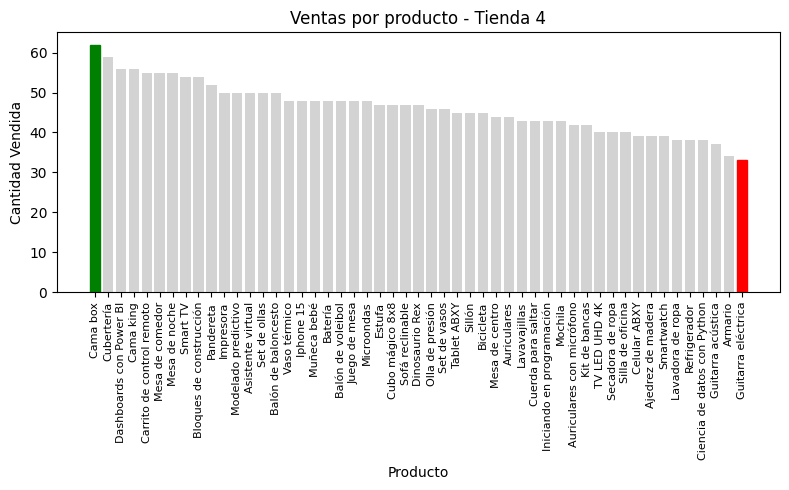

In [ ]:
import matplotlib.pyplot as plt

def resumen_ventas_extremos(tiendas):
    nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    for i, tienda in enumerate(tiendas):
        conteo = tienda['Producto'].value_counts()
        mas_vendido = conteo[conteo == conteo.max()]
        menos_vendido = conteo[conteo == conteo.min()]

        print(f"\n📍 {nombres[i]}")
        print("🟢 Más vendido(s):")
        for producto, cantidad in mas_vendido.items():
            print(f"   - {producto}: {cantidad} unidades")
        print("🔴 Menos vendido(s):")
        for producto, cantidad in menos_vendido.items():
            print(f"   - {producto}: {cantidad} unidades")

        # Gráfico de barras con resaltado
        plt.figure(figsize=(8, 5))
        bars = plt.bar(conteo.index, conteo.values, color='lightgray')

        for bar, label in zip(bars, conteo.index):
            if label in mas_vendido.index:
                bar.set_color('green')
            elif label in menos_vendido.index:
                bar.set_color('red')

        plt.title(f'Ventas por producto - {nombres[i]}')
        plt.xlabel('Producto')
        plt.ylabel('Cantidad Vendida')
        plt.xticks(rotation=90,fontsize=8)
        plt.tight_layout()
        plt.show()
resumen_ventas_extremos(tiendas)

# 5. Envío promedio por tienda

🚚 Tienda 1: $26018.61 MXN de envío promedio
🚚 Tienda 2: $25216.24 MXN de envío promedio
🚚 Tienda 3: $24805.68 MXN de envío promedio
🚚 Tienda 4: $23459.46 MXN de envío promedio


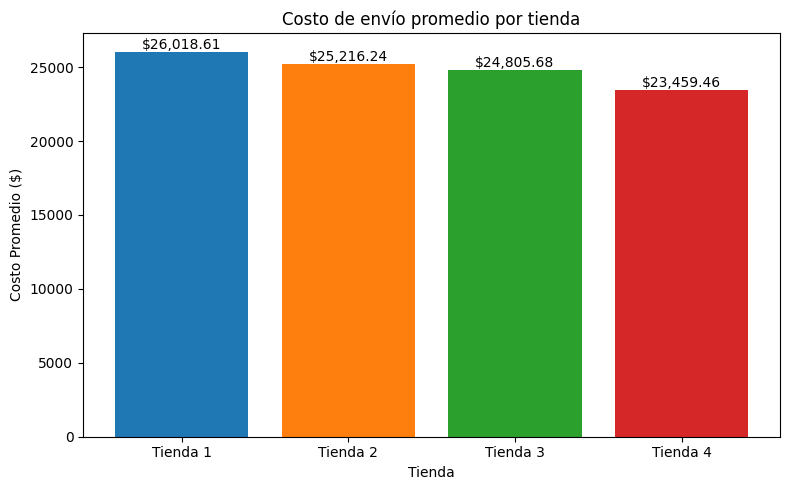

In [ ]:
import matplotlib.pyplot as plt

def envio_promedio(tiendas):
    nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Calcular promedios
    promedios = [tienda['Costo de envío'].mean() for tienda in tiendas]

    # Mostrar promedios en consola
    for nombre, promedio in zip(nombres, promedios):
        print(f"🚚 {nombre}: ${promedio:.2f} MXN de envío promedio")

    # Gráfico de barras
    plt.figure(figsize=(8, 5))
    bars = plt.bar(nombres, promedios, color=colores)
    plt.title('Costo de envío promedio por tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Costo Promedio ($)')

    # Etiquetas sobre las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'${height:,.2f}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()
envio_promedio(tiendas)

In [ ]:
'''
Análisis para el Cierre de una Tienda: Evaluación Integral de Indicadores
Tras analizar los cinco indicadores clave que influyen directamente en el rendimiento y
la sostenibilidad de nuestras tiendas, se concluye que la Tienda 4 es la candidata más adecuada
para ser cerrada. A continuación, se detallan los argumentos que respaldan esta decisión, basados en datos concretos y objetivos:

1. Facturación Total (Análisis de Ingresos)
La Tienda 4 presenta la facturación más baja entre todas las tiendas,
con un total de $1,038,375,700. Esta cifra está por debajo de la media y
representa una diferencia significativa frente a la Tienda 1, que lidera con
más de $1,150 millones. La baja facturación indica una menor demanda, un alcance
de mercado más limitado o posiblemente una menor eficiencia en ventas.
En términos simples, la Tienda 4 genera menos ingresos, lo que compromete su rentabilidad a largo plazo.

2. Calificación Promedio del Cliente
Aunque las diferencias son sutiles, la calificación promedio de la Tienda 4 es de 4.00,
inferior a las de la Tienda 2 (4.04) y la Tienda 3 (4.05).
Esto sugiere que la experiencia del cliente en esta tienda, si bien aceptable,
no es tan satisfactoria como en otras sucursales. En un mercado altamente competitivo,
la percepción del cliente es un factor decisivo para la fidelización y crecimiento.

3. Costo de Envío Promedio
La Tienda 4 muestra el costo de envío promedio más bajo entre todas las tiendas,
con $23,459.46. Aunque esto podría parecer una ventaja operativa, el bajo costo no
se traduce en un mayor volumen de ventas ni en una mejor calificación por parte de los clientes.
Es decir, esta ventaja logística no compensa el bajo rendimiento comercial general.

'''